In [1]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Import standard packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.externals import joblib

Dataset information:

The deataset is provided by the National Institute of Diabetes and Digestive and Kidney Diseases. The patients here are females at least 21 years old of Pima Indian heritage. Attributes (all numerical valued):

   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

In [2]:
diabetesDF = pd.read_csv('diabetes.csv')
print(diabetesDF.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

## Are there any missing values?

The following columns have an invalid zero minimum value:

1: Plasma glucose concentration
2: Diastolic blood pressure
3: Triceps skinfold thickness
4: 2-Hour serum insulin
5: Body mass index

In [3]:
# To verify this, view a few rows:
print(diabetesDF.head(20))

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80            

In [4]:
# How many missing entries do we have?
num_missing = (diabetesDF[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum()
# report the results
print(num_missing)

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [5]:
# Good practive is to replace 0's by NaN... values with a NaN value are ignored from operations like sum, count, etc.
from numpy import nan
diabetesDF[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetesDF[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, nan)
# count the number of nan values in each column
print(diabetesDF.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [6]:
# Check if everything look fine:
print(diabetesDF.head(20))

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6    148.0           72.0           35.0      NaN  33.6   
1             1     85.0           66.0           29.0      NaN  26.6   
2             8    183.0           64.0            NaN      NaN  23.3   
3             1     89.0           66.0           23.0     94.0  28.1   
4             0    137.0           40.0           35.0    168.0  43.1   
5             5    116.0           74.0            NaN      NaN  25.6   
6             3     78.0           50.0           32.0     88.0  31.0   
7            10    115.0            NaN            NaN      NaN  35.3   
8             2    197.0           70.0           45.0    543.0  30.5   
9             8    125.0           96.0            NaN      NaN   NaN   
10            4    110.0           92.0            NaN      NaN  37.6   
11           10    168.0           74.0            NaN      NaN  38.0   
12           10    139.0           80.0            

### Having discovered data is missing, what do we do?
Simplest (brute force) approach: remove rows with missing values...

In [7]:
## Drop rows with missing values...
#diabetesDF.dropna(inplace=True)
## summarize the shape of the data with missing rows removed
#print(diabetesDF.shape)
## Ans: (392,9)

### Better yet, impute missing values

Essentially, estimate the values of the missing feature components...

Possible (still somewhat naive) strategies: 

(a) use a value from another randomly selected record;
(b) use a mean, median or mode value for the column;
(c) use a value estimated by another predictive model.

The imputing strategy used on the training dataset needs to be used on the test data as well... e.g., if one imputes with mean column values, the same mean column values will need to be used during testing on any new data that has missing values.

Useful function (in Pandas): fillna().

In [8]:
# fill missing values with mean column values
diabetesDF.fillna(diabetesDF.mean(), inplace=True)
# count the number of NaN values in each column
print(diabetesDF.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### SimpleImputer
Scikit-learn library contains the SimpleImputer pre-processing class that can be used to replace missing values.
SimpleImputer allows you to specify the value to replace (it can be something other than NaN) and the technique 
used to replace it (mean, median, or mode). The SimpleImputer class operates directly on the NumPy array instead 
of the DataFrame (see the example below).

In [9]:
from sklearn.impute import SimpleImputer
from numpy import isnan
# retrieve the numpy array
values = diabetesDF.values
# define the imputer
imputer = SimpleImputer(missing_values=nan, strategy='mean')
# transform the dataset
diabetesNP = imputer.fit_transform(values)
# count the number of NaN values in each column
print('Missing: %d' % isnan(diabetesNP).sum())

Missing: 0


In [10]:
diabetesNP

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [11]:
TransformedDiabetesDF = pd.DataFrame(diabetesNP, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesScore', 'Age', 'Outcome'])
corr = TransformedDiabetesDF.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesScore,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesScore,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


<Axes: >

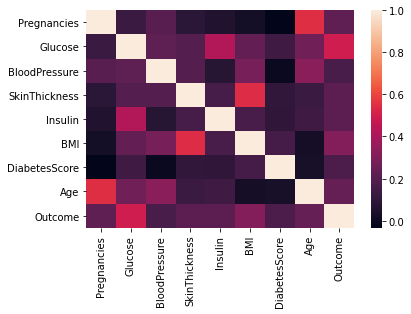

In [12]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [13]:
# Let us use 650 data records for training and 100 data records for testing
# (Reserve 18 data records for validation)

dfTrain = TransformedDiabetesDF[:650]
dfTest = TransformedDiabetesDF[650:750]
dfValid = TransformedDiabetesDF[750:]

In [14]:
#Separating label and features and converting to numpy array to feed into our model
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1))
trainData

array([[6.00e+00, 1.48e+02, 7.20e+01, ..., 3.36e+01, 6.27e-01, 5.00e+01],
       [1.00e+00, 8.50e+01, 6.60e+01, ..., 2.66e+01, 3.51e-01, 3.10e+01],
       [8.00e+00, 1.83e+02, 6.40e+01, ..., 2.33e+01, 6.72e-01, 3.20e+01],
       ...,
       [0.00e+00, 1.79e+02, 5.00e+01, ..., 3.78e+01, 4.55e-01, 2.20e+01],
       [1.10e+01, 1.36e+02, 8.40e+01, ..., 2.83e+01, 2.60e-01, 4.20e+01],
       [0.00e+00, 1.07e+02, 6.00e+01, ..., 2.64e+01, 1.33e-01, 2.30e+01]])

In [17]:
# Normalize the data 
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)

trainData = (trainData - means)/stds
testData = (testData - means)/stds

# means = np.mean(trainData, axis=0)
# stds = np.std(trainData, axis=0)

In [18]:
diabetesCheck = LogisticRegression().fit(trainData, trainLabel)
diabetesCheck.predict(testData[:2, :])
accuracy = diabetesCheck.score(testData,testLabel)
print("accuracy = ",accuracy * 100,"%")

accuracy =  77.0 %
